# Telco Churn Analysis

**Dataset Info:**
DataSet containing Telco customer data and showing customers left last month
This data contains 7043 rows and 21 columns
**The columns are:**
    ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']


# Objective:
    The objective of this project is to analyze historical data of telecom customers and develop a predictive model to identify factors contributing to customer churn and predict potential churners. By understanding the key drivers of churn, the goal is to provide actionable insights to reduce churn rate and improve customer retention strategies.

##### What is churn :
 - Churn is a key driver of EBITDA margin and an industry-wide challenge.
 - A churned customer provides less revenue or zero revenue and increases competitor market share. 
 - It costs  up to 5 times as much for an Service Provider to acquire a new subscriber as to retain
   an existing one

#### What is EBITDA
 - EBITDA stands for =>> Earnings Before Interest, Taxes, Depreciation, and Amortization
 - EBITDA measures a company's revenues
#### How it is calculated
######    EBITDA = E + I + T + D + A
     - E  =	net income
     - I  =	interest
     - T  =	taxes
     - D  =	depreciation (Amount of asset value lost over time.)
     - A  =	amortization (Decreasing an assets cost over a period of time.)

In [1]:
#import the required libraries
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.ticker as mtick  
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from imblearn.combine import SMOTEENN
from sklearn.metrics import roc_auc_score, roc_curve
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

# Loading the data file 

In [2]:
data = pd.read_csv('Telco-Customer-Churn.csv')
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


Look at the top 5 records of data

In [3]:
data.head()
# Digital Subscriber Line(DSL)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Check the various attributes of data like shape (rows and cols), Columns, datatypes

In [4]:
print('InternetService unique feature value =',data['InternetService'].unique())
print(" ")
print('OnlineSecurity unique feature value =',data['OnlineSecurity'].unique())

InternetService unique feature value = ['DSL' 'Fiber optic' 'No']
 
OnlineSecurity unique feature value = ['No' 'Yes' 'No internet service']


In [5]:
data.shape

(7043, 21)

In [6]:
data.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [7]:
# Checking the data types of all the columns
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [8]:
# Check the descriptive statistics of numeric variables
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


 - SeniorCitizen is actually a categorical hence the 25%-50%-75% distribution is not propoer

 - 75% customers have tenure less than 55 months

 - Average Monthly charges are USD 64.76 whereas 25% customers pay more than USD 89.85 per month

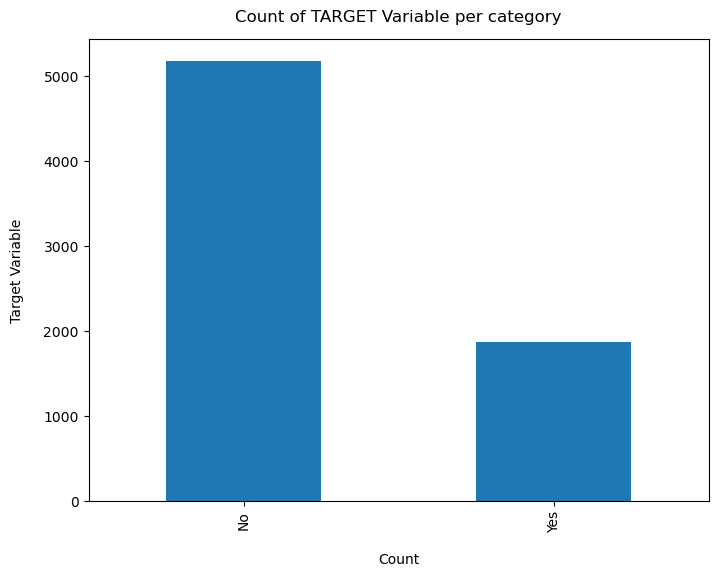

In [9]:
data['Churn'].value_counts().plot(kind='bar', figsize=(8, 6))
plt.xlabel("Count", labelpad=14)
plt.ylabel("Target Variable", labelpad=14)
plt.title("Count of TARGET Variable per category", y=1.02);

In [10]:
# Checking for the data is balanced
100*data['Churn'].value_counts()/len(data['Churn'])

No     73.463013
Yes    26.536987
Name: Churn, dtype: float64

In [11]:
data['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

* Data is highly imbalanced, ratio = 73:27<br>
* So we analyse the data with other features while taking the target values separately to get some insights.

In [12]:
# Concise Summary of the dataframe
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


 -  As we can see in the summary and also in the above graph that our data does not have any null/ missing value

In [13]:
#As we can see that Total charges column is of numeric(float) type but stored as object
# Now we convert 'TotalCharges' column to float
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

# Display the data types after conversion
print(data.dtypes)

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object


### Missing Data - Initial Intuition

* Here, we don't have any missing data.

# Checking for outliers

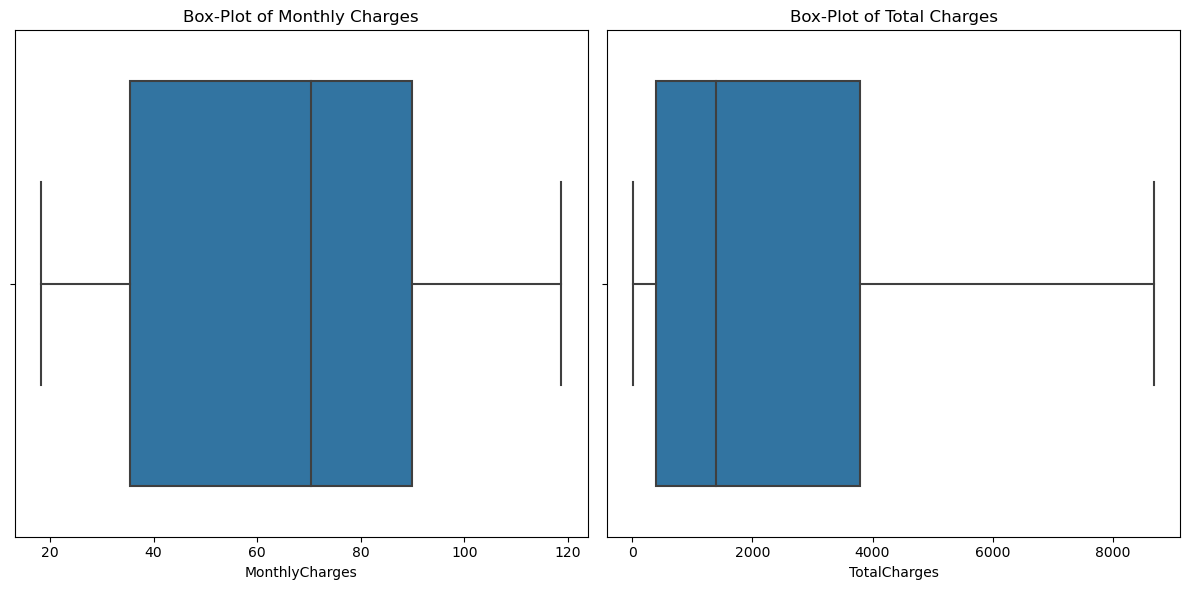

In [14]:
#Now we'll check for the outliers in the numeric columns 

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Plotting MonthlyCharges
sns.boxplot(x='MonthlyCharges', data=data, ax=axes[0])
axes[0].set_title('Box-Plot of Monthly Charges')

# Plotting TotalCharges
sns.boxplot(x='TotalCharges', data=data, ax=axes[1])
axes[1].set_title('Box-Plot of Total Charges')

# Adjusting layout
plt.tight_layout()

# Showing the plot
plt.show()

# Data Cleaning


The column Total Charges should be numeric amount. Let's convert it to numerical data type

In [15]:
data.TotalCharges = pd.to_numeric(data.TotalCharges, errors='coerce')
data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

As we can see there are 11 missing values in TotalCharges column. Let's check these records 

In [16]:
data.loc[data ['TotalCharges'].isnull() == True]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


### Missing Value Treatement

Since the % of these null values compared to total dataset is very low ie 0.15%, so it is safe to ignore them from further processing.

In [17]:
#Removing missing values 
data.dropna(inplace = True)

In [18]:
#Reseting the index
data.reset_index(drop=True, inplace=True)
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7028,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7029,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7030,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [19]:
data.TotalCharges = pd.to_numeric(data.TotalCharges, errors='coerce')
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

 - Now we  Divide customers into bins based on tenure of years given in month 
 - e.g. for tenure < 1 year: assign a tenure group of 1-12, for tenure between 1 to 2 Yrs: tenure group of 13-24; and so on...

In [20]:
# Get the max tenure
print(data['tenure'].max()) 

72


In [21]:
# Group the tenure in bins of 12 months
labels = ["{0} - {1}".format(i, i + 11) for i in range(1, 72, 12)]

data['tenure_group'] = pd.cut(data.tenure, range(1, 80, 12), right=False, labels=labels)

In [22]:
data['tenure_group'].value_counts()

1 - 12     2175
61 - 72    1407
13 - 24    1024
25 - 36     832
49 - 60     832
37 - 48     762
Name: tenure_group, dtype: int64

###### Now we remove the columns which are not required for processing

In [23]:
#drop column customerID and tenure
data.drop(columns= ['customerID','tenure'], axis=1, inplace=True)
data.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1 - 12


## Data Exploration
Plot distibution of individual predictors by churn

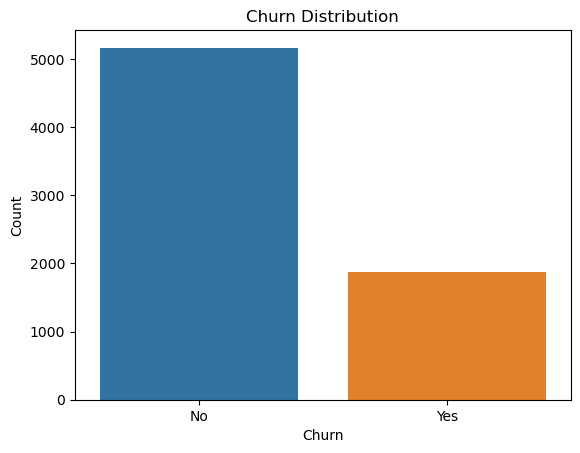

In [24]:
# Plotting the churn distribution
sns.countplot(x='Churn', data=data)
plt.title('Churn Distribution')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()

 This plot shows that distribution of churned (Churn=1) and non-churned (Churn=0) customers. It helps in understanding the proportion of customers who churned. SO here we coclude that the data is not balanced as there is high frequency in the non-churned customers as comoared to the churned customers.

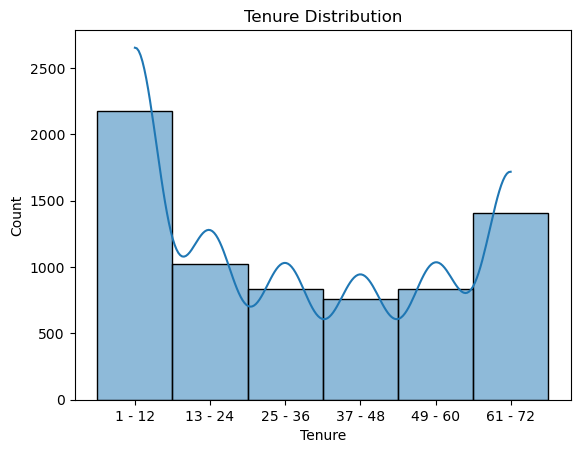

In [25]:
# Plotting the tenure distribution
sns.histplot(data['tenure_group'], kde=True)
plt.title('Tenure Distribution')
plt.xlabel('Tenure')
plt.ylabel('Count')
plt.show()

-  From this graph we conclude that the churned customers are those who are trying the for the first time (i.e The new customers)
 - It helps in understanding the distribution of customer loyalty.

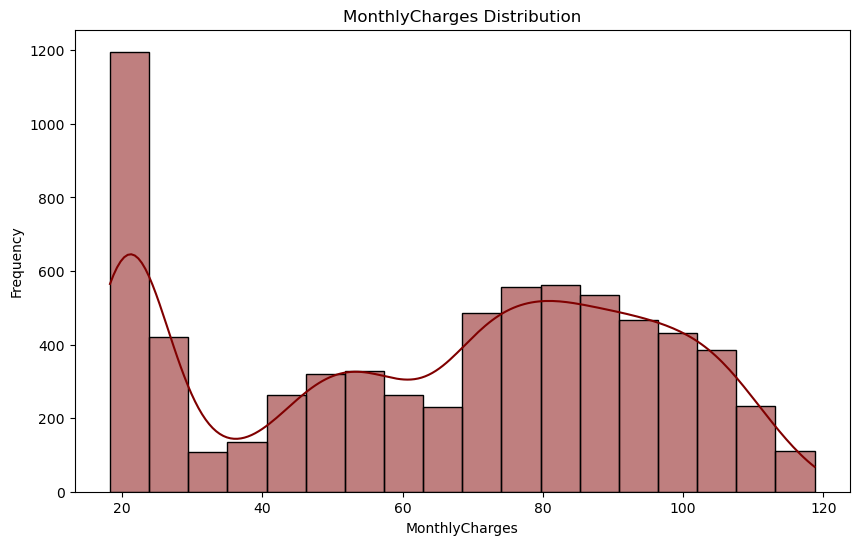

In [26]:
# Plotting histogram for numerical variables
numerical_vars = ['MonthlyCharges']
for var in numerical_vars:
    plt.figure(figsize=(10, 6))
    sns.histplot(data[var], kde=True, color='maroon')
    plt.title(f'{var} Distribution')
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.show() # explain the interpretaion

Monthly Charges Distribution:

- The histogram shows the distribution of monthly charges among customers.
- The height of each bar indicates how many customers fall into each range of monthly charges
- The kde (kernel density estimation) curve overlaid on the histogram provides a smoothed estimate of the distribution of monthly charges.

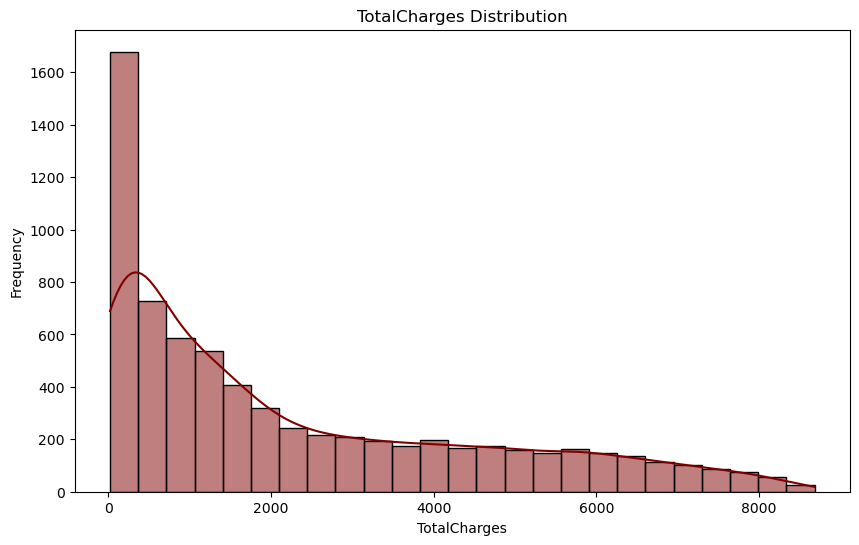

In [27]:
# Plotting histogram for numerical variables
numerical_vars = ['TotalCharges']
for var in numerical_vars:
    plt.figure(figsize=(10, 6))
    sns.histplot(data[var], kde=True, color='maroon')
    plt.title(f'{var} Distribution')
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.show() # explain the interpretaion

 - The above graph is negatively skewed.
 - This shows that the frequency decreases as the total charges increases that is the customers avoid high expences.

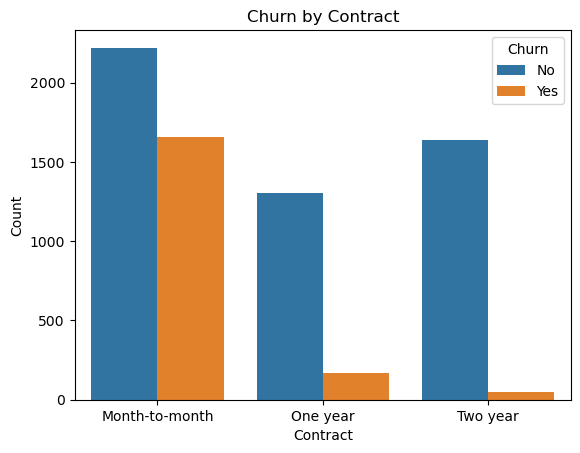

In [28]:
sns.countplot(x='Contract', hue='Churn', data=data, )
plt.title('Churn by Contract')
plt.xlabel('Contract')
plt.ylabel('Count')
plt.show()

 - This Graph shows that the Distribution of churned and non-churned **customers based on their contract type**.
 - Monthly customers are high churners as comoared to their respective non-churned customers in the yearly customers.

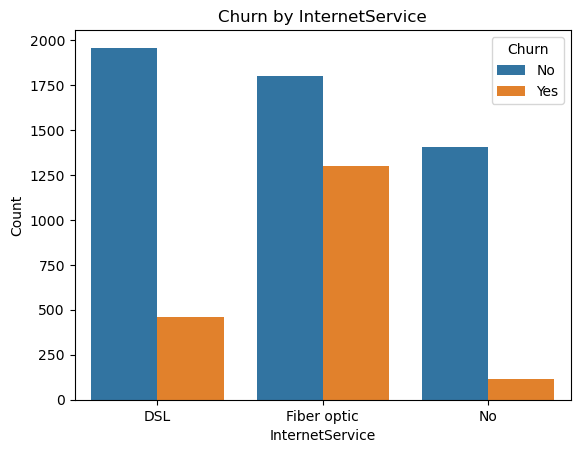

In [29]:
sns.countplot(x='InternetService', hue='Churn', data=data, )
plt.title('Churn by InternetService')
plt.xlabel('InternetService')
plt.ylabel('Count')
plt.show()

 - This plot suggests that **customers without internet service are less likely to churn compared to those with internet service.**

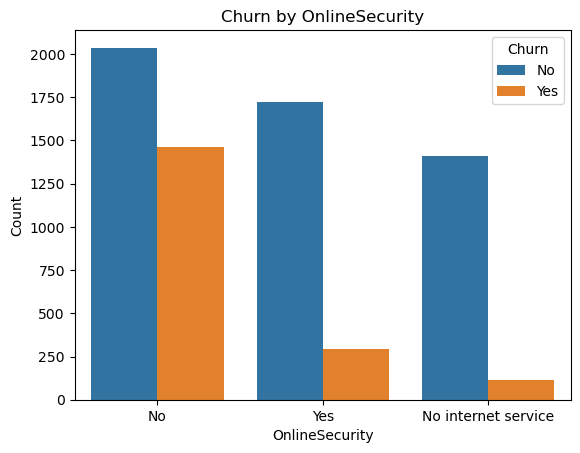

In [30]:
sns.countplot(x='OnlineSecurity', hue='Churn', data=data)
plt.title('Churn by OnlineSecurity')
plt.xlabel('OnlineSecurity')
plt.ylabel('Count')
plt.show()

 - These  plot Shows that **Customers without **Online Security are more likely to churn** compared to those **with online security.**

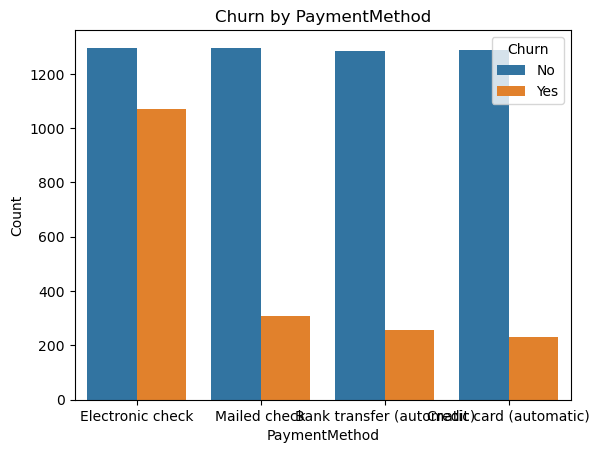

In [31]:
sns.countplot(x='PaymentMethod', hue='Churn', data=data)
plt.title('Churn by PaymentMethod')
plt.xlabel('PaymentMethod')
plt.ylabel('Count')
plt.show()

 - * This Plot shows that the **Relationship Between the PaymentMethod**  and **count of Customers in each category** of **paymentMethod.**  Whether They are **Churned or not.**
 - The Customers with electronic check are likely to be churned.

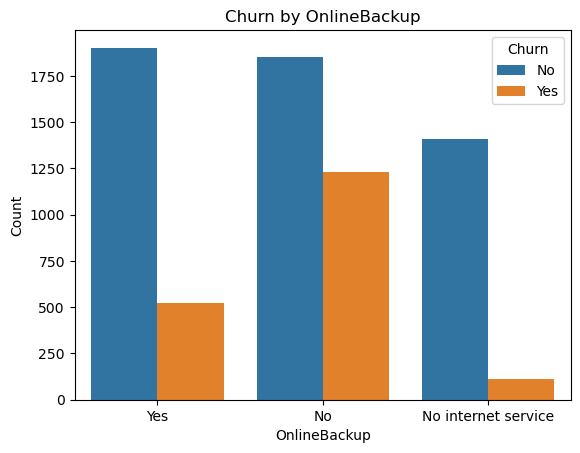

In [32]:
sns.countplot(x='OnlineBackup', hue='Churn', data=data)
plt.title('Churn by OnlineBackup')
plt.xlabel('OnlineBackup')
plt.ylabel('Count')
plt.show()

 - This plot shows that the **presence or absence of online backup** related to Churn among the telecommunication customers.
 - The customers with having no online backup are likely to be high churners.

##### Converting the target variable 'Churn'  in a binary numeric variable i.e. Yes=1 ; No = 0

In [33]:
data['Churn'] = np.where(data['Churn'] == 'Yes', 1, 0)
data

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,1 - 12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,Male,0,Yes,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,0,13 - 24
7028,Female,0,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,0,61 - 72
7029,Female,0,Yes,Yes,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,0,1 - 12
7030,Male,1,Yes,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,1,1 - 12


###### Converting all the categorical variables into dummy variables

In [34]:
df = pd.get_dummies(data,drop_first=True)
df.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,29.85,29.85,0,0,1,0,0,1,0,...,0,1,0,1,0,0,0,0,0,0
1,0,56.95,1889.50,0,1,0,0,1,0,0,...,0,0,0,0,1,0,1,0,0,0
2,0,53.85,108.15,1,1,0,0,1,0,0,...,0,1,0,0,1,0,0,0,0,0
3,0,42.30,1840.75,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,0,70.70,151.65,1,0,0,0,1,0,0,...,0,1,0,1,0,0,0,0,0,0


Finding the relationship between Monthly Charges and Total Charges

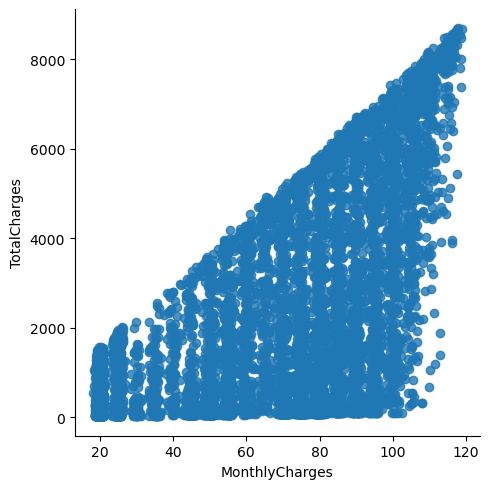

In [35]:
sns.lmplot(data=df, x='MonthlyCharges', y='TotalCharges', fit_reg=False)

###### Building a corelation of all predictors with 'Churn' 

<Axes: >

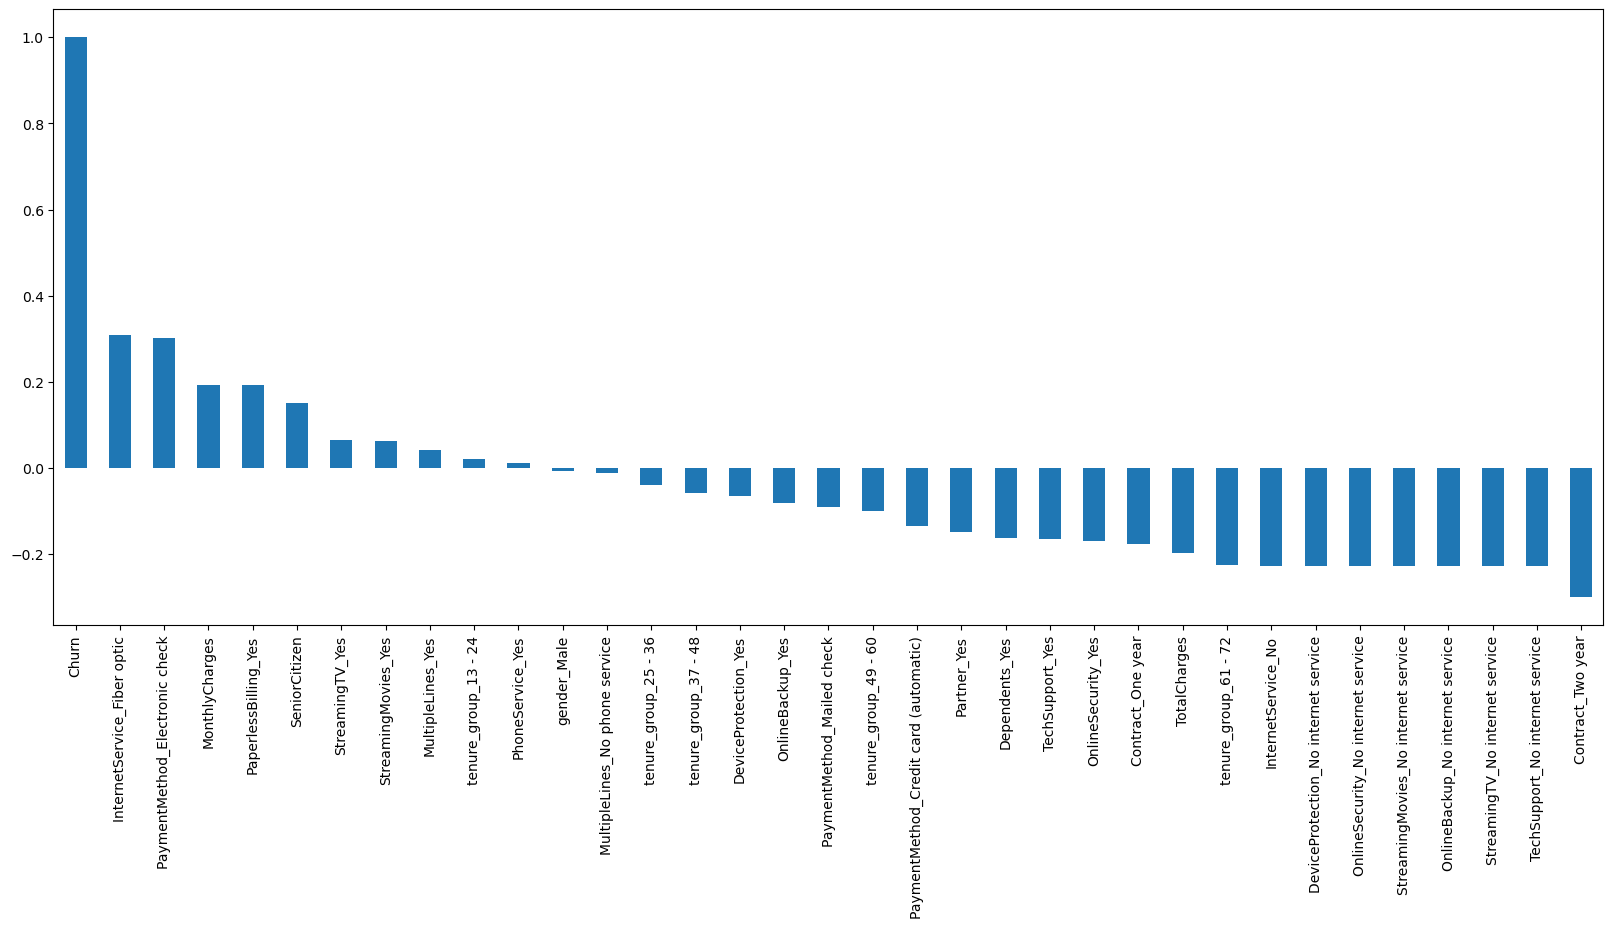

In [36]:
plt.figure(figsize=(20,8))
df.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

**Derived Insight: **

**HIGH** Churn seen in case of  **Month to month contracts**, **No online security**, **No Tech support**, **First year of subscription** and **Fibre Optics Internet**

**LOW** Churn is seens in case of **Long term contracts**, **Subscriptions without internet service** and **The customers engaged for 5+ years**

Factors like **Gender**, **Availability of PhoneService** and **# of multiple lines** have alomost **NO** impact on Churn

This is also evident from the **Heatmap** below

<Axes: >

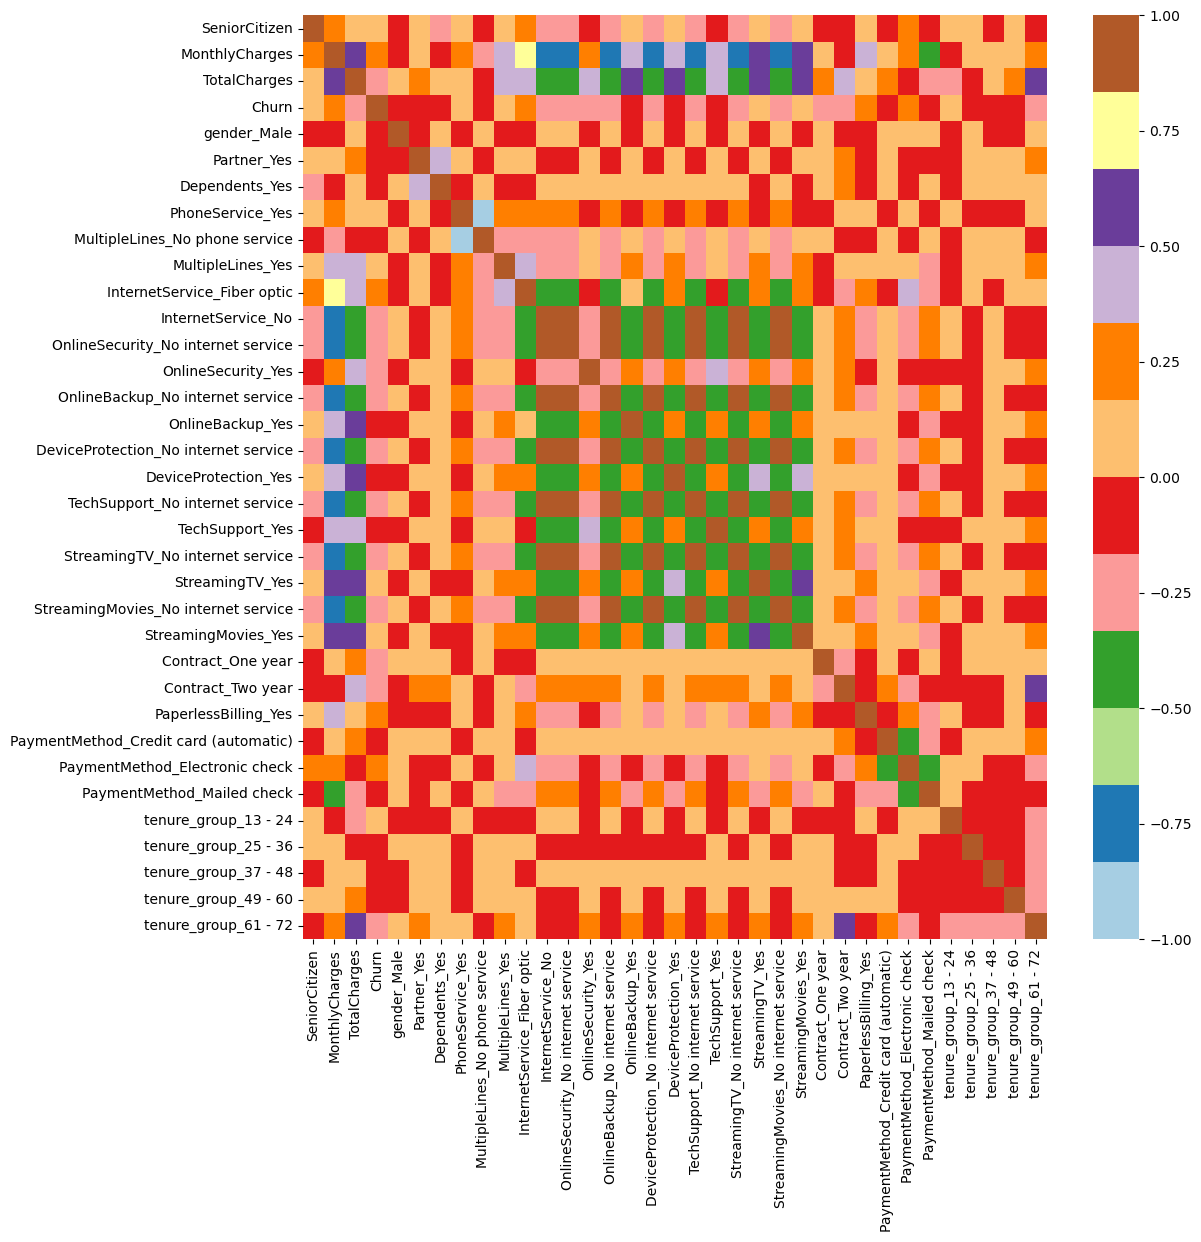

In [37]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(), cmap="Paired")

### Building models

In [38]:
df.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,29.85,29.85,0,0,1,0,0,1,0,...,0,1,0,1,0,0,0,0,0,0
1,0,56.95,1889.50,0,1,0,0,1,0,0,...,0,0,0,0,1,0,1,0,0,0
2,0,53.85,108.15,1,1,0,0,1,0,0,...,0,1,0,0,1,0,0,0,0,0
3,0,42.30,1840.75,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,0,70.70,151.65,1,0,0,0,1,0,0,...,0,1,0,1,0,0,0,0,0,0


In [39]:
X=df.drop('Churn',axis=1)
X

,SeniorCitizen,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,...,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,29.85,29.85,0,1,0,0,1,0,0,...,0,1,0,1,0,0,0,0,0,0
1,0,56.95,1889.50,1,0,0,1,0,0,0,...,0,0,0,0,1,0,1,0,0,0
2,0,53.85,108.15,1,0,0,1,0,0,0,...,0,1,0,0,1,0,0,0,0,0
3,0,42.30,1840.75,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,70.70,151.65,0,0,0,1,0,0,1,...,0,1,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0,84.80,1990.50,1,1,1,1,0,1,0,...,0,1,0,0,1,1,0,0,0,0
7028,0,103.20,7362.90,0,1,1,1,0,1,1,...,0,1,1,0,0,0,0,0,0,1
7029,0,29.60,346.45,0,1,1,0,1,0,0,...,0,1,0,1,0,0,0,0,0,0
7030,1,74.40,306.60,1,1,0,1,0,1,1,...,0,1,0,0,1,0,0,0,0,0


In [40]:
y=df['Churn']
y

0       0
1       0
2       1
3       0
4       1
       ..
7027    0
7028    0
7029    0
7030    1
7031    0
Name: Churn, Length: 7032, dtype: int32

### Splitting the dataset into Training & Testing

In [41]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [42]:
from sklearn.linear_model import LogisticRegression

In [43]:
model_lr = LogisticRegression()
model_lr.fit(X_train,y_train)

LogisticRegression()

In [44]:
# Calculate training set accuracy
ytr_pred = model_lr.predict(X_train)
cm = confusion_matrix(y_train, ytr_pred)
print(cm)
print("ACCURACY {:.4f}".format(accuracy_score(y_train, ytr_pred)))

[[3776  349]
 [ 753  747]]
ACCURACY 0.8041


In [45]:
y_pred = model_lr.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("ACCURACY {:.4f}".format(accuracy_score(y_test, y_pred)))

[[950  88]
 [188 181]]
ACCURACY 0.8038


In [46]:
print(classification_report(y_test, y_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.83      0.92      0.87      1038
           1       0.67      0.49      0.57       369

    accuracy                           0.80      1407
   macro avg       0.75      0.70      0.72      1407
weighted avg       0.79      0.80      0.79      1407



###### As we can see that the accuracy is quite low, and as it's an imbalanced dataset, we shouldn't consider Accuracy as our metrics to measure the model, as Accuracy is cursed in imbalanced datasets.

###### Hence, we need to check recall, precision & f1 score for the minority class, and it's quite evident that the precision, recall & f1 score is too low for Class 1, i.e. churned customers.


## Hence, moving ahead to call SMOTEENN (UpSampling + ENN)
 - SMOTE-ENN (Synthetic Minority Over-sampling Technique with Edited Nearest Neighbors) is
   a combination of two techniques: 
     - SMOTE (for over-sampling the minority class) and 
     - ENN (Edited Nearest Neighbors, for under-sampling both classes). 
 - SMOTE-ENN is designed to address class imbalance in binary classification problems.

In [47]:
sm = SMOTEENN()
X_resampled, y_resampled = sm.fit_resample(X,y)

In [48]:
X_resampled

,SeniorCitizen,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,...,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,56.950000,1889.500000,1,0,0,1,0,0,0,...,0,0,0,0,1,0,1,0,0,0
1,0,42.300000,1840.750000,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,56.150000,3487.950000,1,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,105.500000,2686.050000,1,0,0,1,0,0,1,...,0,1,0,1,0,0,1,0,0,0
4,0,113.250000,7895.150000,0,1,1,1,0,1,1,...,1,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5807,0,82.377014,267.465505,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5808,0,87.177161,1229.446090,0,1,0,1,0,0,1,...,0,0,0,1,0,1,0,0,0,0
5809,0,77.441172,333.380760,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5810,0,83.355415,1527.990882,0,0,0,1,0,1,1,...,0,1,0,0,0,1,0,0,0,0


In [49]:
y_resampled

0       0
1       0
2       0
3       0
4       0
       ..
5807    1
5808    1
5809    1
5810    1
5811    1
Name: Churn, Length: 5812, dtype: int32

In [50]:
100*y_resampled.value_counts()/len(y_resampled)

1    53.802478
0    46.197522
Name: Churn, dtype: float64

##### Here we can see that by resampling, the data is now balanced (55-45)%

### Splitting the resampled data into Train & Test Set

In [51]:
Xr_train,Xr_test,yr_train,yr_test=train_test_split(X_resampled, y_resampled,
                                                   test_size=0.2,random_state=0)

## Logistic Regression for the resampled data

In [52]:
model_lr_smote = LogisticRegression()
model_lr_smote.fit(X_resampled,y_resampled)

LogisticRegression()

In [53]:
# Calculate training set accuracy
ytr_pred = model_lr_smote.predict(Xr_train)
cm = confusion_matrix(yr_train, ytr_pred)
print(cm)
print("ACCURACY {:.4f}".format(accuracy_score(yr_train, ytr_pred)))

[[1973  185]
 [ 164 2327]]
ACCURACY 0.9249


In [54]:
yr_predict = model_lr_smote.predict(Xr_test)
cm = confusion_matrix(yr_test, yr_predict)
print(cm)
print("ACCURACY {:.4f}".format(accuracy_score(yr_test, yr_predict)))

[[494  33]
 [ 48 588]]
ACCURACY 0.9304


In [55]:
print(classification_report(yr_test, yr_predict, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.91      0.94      0.92       527
           1       0.95      0.92      0.94       636

    accuracy                           0.93      1163
   macro avg       0.93      0.93      0.93      1163
weighted avg       0.93      0.93      0.93      1163



###### Now we can see quite better results, i.e. Accuracy: 92 %, and a very good recall, precision & f1 score for minority class.

###### Let's try with some other classifier.

# Decision Tree

Best Parameters:  {'max_depth': 5}
Best Accuracy:  0.7893


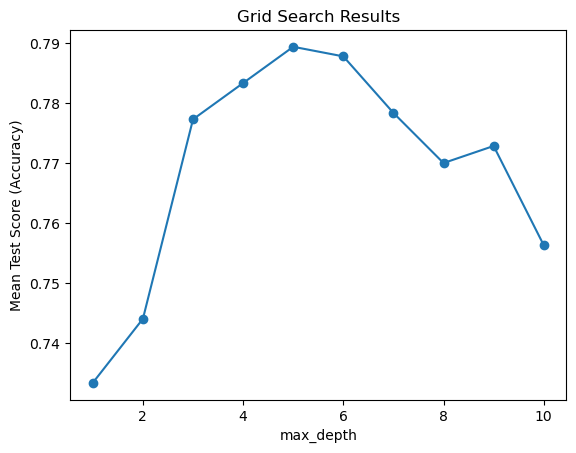

In [56]:
classifier = DecisionTreeClassifier(criterion='gini', random_state=0)

param_grid = {'max_depth': [i for i in range(1,11)]}

grid_search = GridSearchCV(classifier, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best Parameters: ", grid_search.best_params_)
print("Best Accuracy: ", "{:.4f}".format(grid_search.best_score_))

results = grid_search.cv_results_
plt.plot(param_grid['max_depth'], results['mean_test_score'], marker='o')
plt.xlabel('max_depth')
plt.ylabel('Mean Test Score (Accuracy)')
plt.title('Grid Search Results')
plt.show()

 - Here we can see that themx_depth of 5 will give the best accuracy for our data in decision tree. Hence we select the max depth as 5 and build the decision tree model.

In [57]:
model_dt=DecisionTreeClassifier(criterion = "gini",max_depth=5, min_samples_leaf=8,random_state = 0)

In [58]:
model_dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=8, random_state=0)

In [59]:
# Calculating the training set accuracy
ytr_pred1 = model_dt.predict(X_train)
cm = confusion_matrix(y_train, ytr_pred1)
print(cm)
print("ACCURACY {:.4f}".format(accuracy_score(y_train, ytr_pred1)))

[[3672  453]
 [ 668  832]]
ACCURACY 0.8007


In [60]:
y_pred1 = model_dt.predict(X_test)
y_pred1

array([0, 0, 0, ..., 1, 0, 0])

In [61]:
print("ACCURACY= {:.4f}".format(model_dt.score(X_test,y_test)))
print(confusion_matrix(y_test, y_pred1))

ACCURACY= 0.7910
[[923 115]
 [179 190]]


In [62]:
print(classification_report(y_test, y_pred1, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1038
           1       0.62      0.51      0.56       369

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407



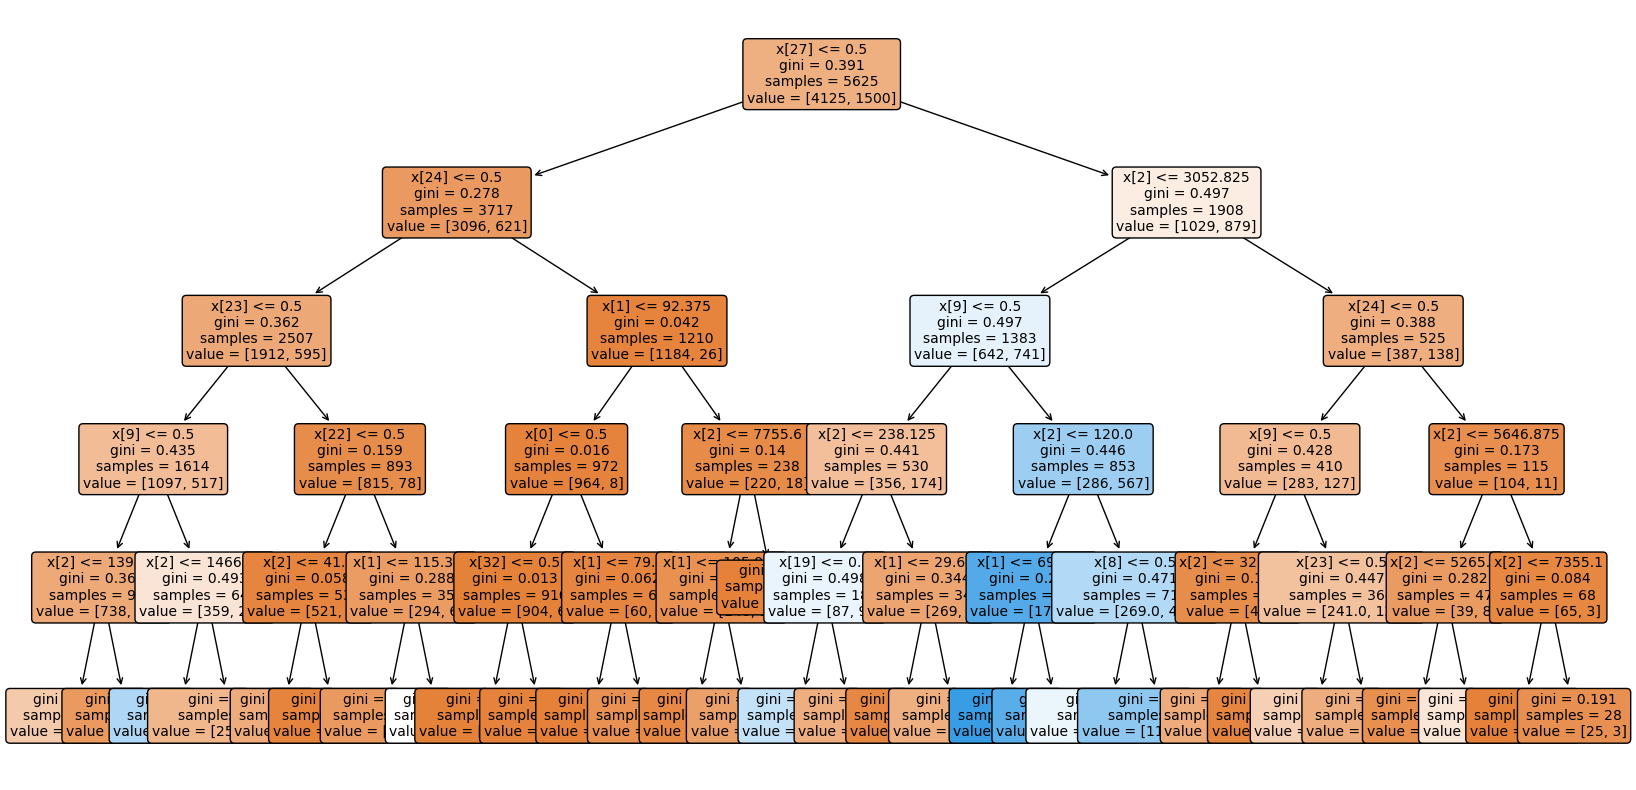

In [63]:
plt.figure(figsize=(20, 10))
plot_tree(model_dt, filled=True, rounded=True, fontsize=10)
plt.show()

### Building Decision Tree for Resampled data

In [64]:
model_dt_smote=DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=9,
                                      min_samples_leaf=8)

In [65]:
model_dt_smote.fit(Xr_train,yr_train)

DecisionTreeClassifier(max_depth=9, min_samples_leaf=8, random_state=100)

In [66]:
# Calculate training set accuracy
ytrr_pred1 = model_dt_smote.predict(Xr_train)
cm = confusion_matrix(yr_train, ytrr_pred1)
print(cm)
print("ACCURACY {:.4f}".format(accuracy_score(yr_train, ytrr_pred1)))

[[2047  111]
 [  92 2399]]
ACCURACY 0.9563


In [67]:
yr_predict1 = model_dt_smote.predict(Xr_test)

In [68]:
model_score_r = model_dt_smote.score(Xr_test, yr_test)

In [69]:
print("ACCURACY= {:.4f}".format(model_score_r))
print(classification_report(yr_test, yr_predict1))

ACCURACY= 0.9347
              precision    recall  f1-score   support

           0       0.92      0.93      0.93       527
           1       0.94      0.94      0.94       636

    accuracy                           0.93      1163
   macro avg       0.93      0.93      0.93      1163
weighted avg       0.93      0.93      0.93      1163



In [70]:
print(confusion_matrix(yr_test, yr_predict1))

[[492  35]
 [ 41 595]]


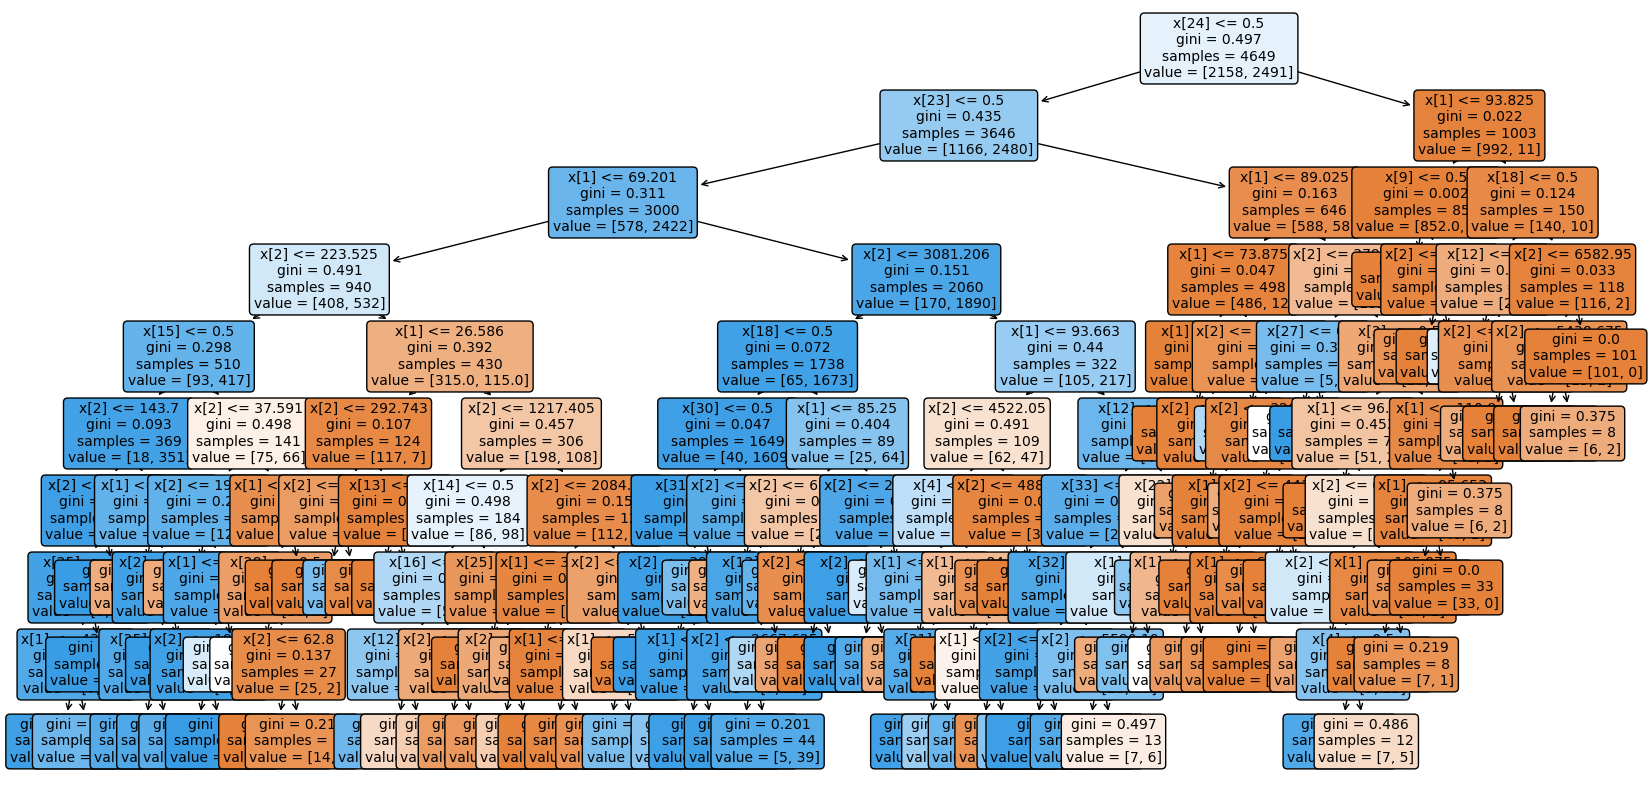

In [71]:
plt.figure(figsize=(20, 10))
plot_tree(model_dt_smote, filled=True, rounded=True, fontsize=10)
plt.show()

# Random Forest Classifier

In [72]:
model_rf=RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 100,max_depth=5, 
                                min_samples_leaf=8)

In [73]:
model_rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=5, min_samples_leaf=8, random_state=100)

In [74]:
# Calculate training set accuracy
ytr_pred2 = model_rf.predict(X_train)
cm = confusion_matrix(y_train, ytr_pred2)
print(cm)
print("ACCURACY {:.4f}".format(accuracy_score(y_train, ytr_pred2)))

[[3887  238]
 [ 904  596]]
ACCURACY 0.7970


In [75]:
y_pred2=model_rf.predict(X_test)

In [76]:
print("ACCURACY= {:.4f}".format(model_rf.score(X_test,y_test)))

ACCURACY= 0.7825


In [77]:
print(classification_report(y_test, y_pred2, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.80      0.94      0.86      1038
           1       0.67      0.33      0.44       369

    accuracy                           0.78      1407
   macro avg       0.74      0.64      0.65      1407
weighted avg       0.77      0.78      0.75      1407



## Random Forest for resampled data

In [78]:
model_rf_smote=RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 100,
                                      max_depth=9, min_samples_leaf=8)

In [79]:
model_rf_smote.fit(Xr_train,yr_train)

RandomForestClassifier(max_depth=9, min_samples_leaf=8, random_state=100)

In [80]:
# Calculate training set accuracy
ytrr_pred2 = model_rf_smote.predict(Xr_train)
cm = confusion_matrix(yr_train, ytrr_pred2)
print(cm)
print("ACCURACY {:.4f}".format(accuracy_score(yr_train, ytrr_pred2)))

[[1998  160]
 [  79 2412]]
ACCURACY 0.9486


In [81]:
yr_predict2 = model_rf_smote.predict(Xr_test)

In [82]:
model_score_r2 = model_rf_smote.score(Xr_test, yr_test)

In [83]:
print("ACCURACY= {:.4f}".format(model_score_r2))
print(classification_report(yr_test, yr_predict2))

ACCURACY= 0.9467
              precision    recall  f1-score   support

           0       0.95      0.93      0.94       527
           1       0.94      0.96      0.95       636

    accuracy                           0.95      1163
   macro avg       0.95      0.95      0.95      1163
weighted avg       0.95      0.95      0.95      1163



In [84]:
print(confusion_matrix(yr_test, yr_predict2))

[[490  37]
 [ 25 611]]


###### With Random Forest Classifier, also we are able to get quite good results,  infact we are getting  better than Decision Tree.

# AUC-ROC Curve for original data

AUC-ROC for Logistic Regression: 0.84
AUC-ROC for Decision Tree: 0.82
AUC-ROC for Random Forest: 0.84


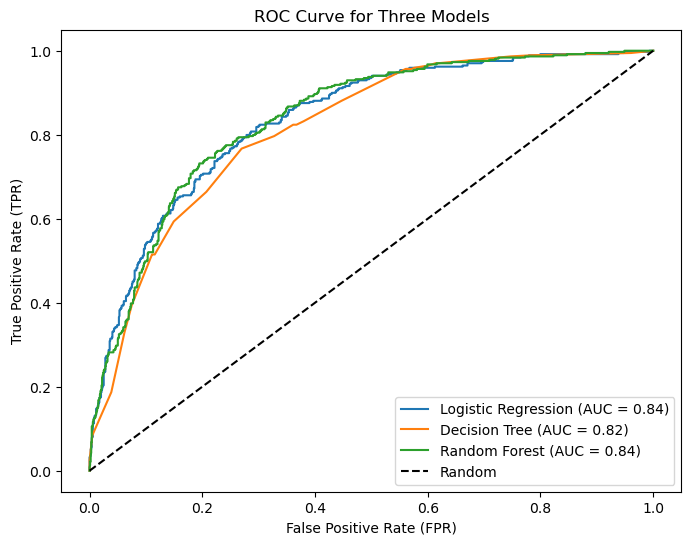

In [85]:
y_probs_model1 = model_lr.predict_proba(X_test)[:, 1]
y_probs_model2 = model_dt.predict_proba(X_test)[:, 1]
y_probs_model3 = model_rf.predict_proba(X_test)[:, 1]

auc_1 = roc_auc_score(y_test, y_probs_model1)
auc_2 = roc_auc_score(y_test, y_probs_model2)
auc_3 = roc_auc_score(y_test, y_probs_model3)

print(f'AUC-ROC for Logistic Regression: {auc_1:.2f}')
print(f'AUC-ROC for Decision Tree: {auc_2:.2f}')
print(f'AUC-ROC for Random Forest: {auc_3:.2f}')

# Ploting ROC curves for each model
fpr_1, tpr_1, _ = roc_curve(y_test, y_probs_model1)
fpr_2, tpr_2, _ = roc_curve(y_test, y_probs_model2)
fpr_3, tpr_3, _ = roc_curve(y_test, y_probs_model3)

plt.figure(figsize=(8, 6))
plt.plot(fpr_1, tpr_1, label=f'Logistic Regression (AUC = {auc_1:.2f})')
plt.plot(fpr_2, tpr_2, label=f'Decision Tree (AUC = {auc_2:.2f})')
plt.plot(fpr_3, tpr_3, label=f'Random Forest (AUC = {auc_3:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve for Three Models')
plt.legend()
plt.show()


# AUC-ROC Curve for resampled data

AUC-ROC for Logistic Regression: 0.98
AUC-ROC for Decision Tree: 0.98
AUC-ROC for Random Forest: 0.98


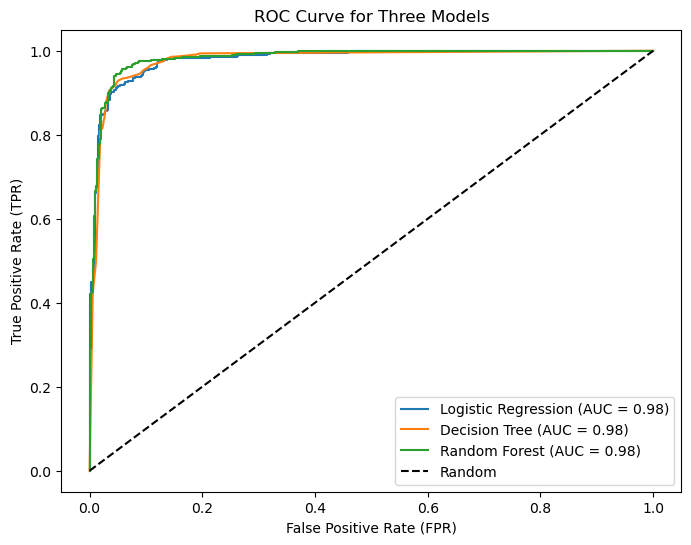

In [86]:
y_probs_model1 = model_lr_smote.predict_proba(Xr_test)[:, 1]
y_probs_model2 = model_dt_smote.predict_proba(Xr_test)[:, 1]
y_probs_model3 = model_rf_smote.predict_proba(Xr_test)[:, 1]

auc_1 = roc_auc_score(yr_test, y_probs_model1)
auc_2 = roc_auc_score(yr_test, y_probs_model2)
auc_3 = roc_auc_score(yr_test, y_probs_model3)

print(f'AUC-ROC for Logistic Regression: {auc_1:.2f}')
print(f'AUC-ROC for Decision Tree: {auc_2:.2f}')
print(f'AUC-ROC for Random Forest: {auc_3:.2f}')

# Ploting ROC curves for each model
fpr_1, tpr_1, _ = roc_curve(yr_test, y_probs_model1)
fpr_2, tpr_2, _ = roc_curve(yr_test, y_probs_model2)
fpr_3, tpr_3, _ = roc_curve(yr_test, y_probs_model3)

plt.figure(figsize=(8, 6))
plt.plot(fpr_1, tpr_1, label=f'Logistic Regression (AUC = {auc_1:.2f})')
plt.plot(fpr_2, tpr_2, label=f'Decision Tree (AUC = {auc_2:.2f})')
plt.plot(fpr_3, tpr_3, label=f'Random Forest (AUC = {auc_3:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve for Three Models')
plt.legend()
plt.show()


 -  We can clearly see that the resamoled data gives us much better results in all terms as compared to the original data.

###### Now we will test new (unseen) data using  models that we have build.

In [87]:
new_data_point = np.array([])
for i in X.columns:
    value = float(input("Input value for {} ".format(i)))
    new_data_point = np.append(new_data_point,value)
new_data_point


Input value for SeniorCitizen 0
Input value for MonthlyCharges 45
Input value for TotalCharges 264
Input value for gender_Male 1
Input value for Partner_Yes 1
Input value for Dependents_Yes 0
Input value for PhoneService_Yes 1
Input value for MultipleLines_No phone service 1
Input value for MultipleLines_Yes 0
Input value for InternetService_Fiber optic 1
Input value for InternetService_No 0
Input value for OnlineSecurity_No internet service 1
Input value for OnlineSecurity_Yes 1
Input value for OnlineBackup_No internet service 0
Input value for OnlineBackup_Yes 1
Input value for DeviceProtection_No internet service 0
Input value for DeviceProtection_Yes 1
Input value for TechSupport_No internet service 1
Input value for TechSupport_Yes 0
Input value for StreamingTV_No internet service 1
Input value for StreamingTV_Yes 0
Input value for StreamingMovies_No internet service 1
Input value for StreamingMovies_Yes 1
Input value for Contract_One year 0
Input value for Contract_Two year 1
Inp

array([  0.,  45., 264.,   1.,   1.,   0.,   1.,   1.,   0.,   1.,   0.,
         1.,   1.,   0.,   1.,   0.,   1.,   1.,   0.,   1.,   0.,   1.,
         1.,   0.,   1.,   1.,   0.,   1.,   0.,   0.,   0.,   0.,   1.,
         0.])

## Models built on original (imbalanced) data

In [88]:
# Reshape the data point to match the shape expected by the models
new_data_point_reshaped = new_data_point.reshape(1, -1)

# Predict the class for the single data point
models = ['model_lr','model_dt','model_rf',]
for model_name in models:
    if model_name== 'model_lr':
        print("The prediction made by the Logistic Regression Model built on original data")
        prediction = model_lr.predict(new_data_point_reshaped)
        predicted_probabilities = model_lr.predict_proba(new_data_point_reshaped)
        
    elif model_name == 'model_dt':
        print("The prediction made by the Decision Tree Model built on original data")
        prediction = model_dt.predict(new_data_point_reshaped)
        predicted_probabilities = model_dt.predict_proba(new_data_point_reshaped)
        
    else:
        print("The prediction made by the Random Forest Model built on original data")
        prediction = model_rf.predict(new_data_point_reshaped)
        predicted_probabilities = model_rf.predict_proba(new_data_point_reshaped)

    
    print("Predicted Class:", prediction)
    print("Predicted Probabilities:", predicted_probabilities) 
    print(" ")

The prediction made by the Logistic Regression Model built on original data
Predicted Class: [0]
Predicted Probabilities: [[0.79671276 0.20328724]]
 
The prediction made by the Decision Tree Model built on original data
Predicted Class: [1]
Predicted Probabilities: [[0.47352025 0.52647975]]
 
The prediction made by the Random Forest Model built on original data
Predicted Class: [0]
Predicted Probabilities: [[0.75825428 0.24174572]]
 


## Models built on resampled (balanced) data

In [89]:
# Reshape the data point to match the shape expected by the models
new_data_point_reshaped = new_data_point.reshape(1, -1)

# Predict the class for the single data point
models = ['model_lr_smote','model_dt_smote','model_rf_smote']
for model_name in models:
    if model_name== 'model_lr_smote':
        print("The prediction made by the Logistic Regression Model built on resamplesd data")
        prediction = model_lr_smote.predict(new_data_point_reshaped)
        predicted_probabilities = model_lr_smote.predict_proba(new_data_point_reshaped)
        
    elif model_name == 'model_dt_smote':
        print("The prediction made by the Decision Tree Model built on resampled data")
        prediction = model_dt_smote.predict(new_data_point_reshaped)
        predicted_probabilities = model_dt_smote.predict_proba(new_data_point_reshaped)
        
    else:
        print("The prediction made by the Random Forest Model built on resampled data")
        prediction = model_rf_smote.predict(new_data_point_reshaped)
        predicted_probabilities = model_rf_smote.predict_proba(new_data_point_reshaped)
        
    print("Predicted Class:", prediction)
    print("Predicted Probabilities:", predicted_probabilities) 
    print(" ")
    

The prediction made by the Logistic Regression Model built on resamplesd data
Predicted Class: [0]
Predicted Probabilities: [[0.93783126 0.06216874]]
 
The prediction made by the Decision Tree Model built on resampled data
Predicted Class: [0]
Predicted Probabilities: [[0.875 0.125]]
 
The prediction made by the Random Forest Model built on resampled data
Predicted Class: [0]
Predicted Probabilities: [[0.80655084 0.19344916]]
 
